In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder



import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.datasets import fashion_mnist
# load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

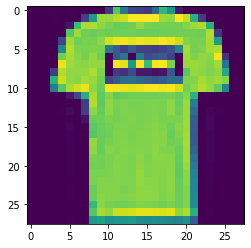

In [4]:
plt.imshow(x_train[1])
plt.show()

In [5]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
adam = tf.keras.optimizers.Adam(0.001)
sgd = tf.keras.optimizers.SGD(0.001)
acc = tf.keras.metrics.SparseCategoricalAccuracy()

In [7]:
model = Sequential()

model.add(layers.Dense(32,input_shape=(784,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.compile(optimizer=adam,metrics=acc,loss=loss_fn)

In [9]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 4.8428 - sparse_categorical_accuracy: 0.7339 - val_loss: 1.4321 - val_sparse_categorical_accuracy: 0.7538
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8618 - sparse_categorical_accuracy: 0.7875 - val_loss: 0.7849 - val_sparse_categorical_accuracy: 0.7853
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6449 - sparse_categorical_accuracy: 0.8012 - val_loss: 0.7493 - val_sparse_categorical_accuracy: 0.7472
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6272 - sparse_categorical_accuracy: 0.8060 - val_loss: 0.8741 - val_sparse_categorical_accuracy: 0.7501
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5926 - sparse_categorical_accuracy: 0.8105 - val_loss: 0.5896 - val_sparse_categorical_accuracy: 0.8084
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5651 - spars

In [10]:
# after training, we will define a probabilty model with softmax as output

probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

y_preds = probability_model(x_test).numpy().argmax(axis=1)
print(accuracy_score(y_test,y_preds))

0.8351


In [11]:
model = Sequential()

model.add(layers.Dense(32,input_shape=(784,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))


model.compile(optimizer=sgd,metrics=['accuracy'],loss=loss_fn)

history = model.fit(x_train,y_train, validation_split=0.2,epochs=5)


Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.1030
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030


In [12]:
# after training, we will define a probabilty model with softmax as output

probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

y_preds = probability_model(x_test).numpy().argmax(axis=1)
print(accuracy_score(y_test,y_preds))

0.1


In [13]:
model = Sequential()

model.add(layers.Dense(32,input_shape=(784,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))


model.compile(optimizer=sgd,metrics=['accuracy'],loss=loss_fn)

history = model.fit(x_train,y_train, validation_split=0.2,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0994 - val_loss: nan - val_accuracy: 0.1030
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030


In [14]:
model = Sequential()

model.add(layers.Dense(32,input_shape=(784,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))

model.add(layers.Dense(10))


model.compile(optimizer=sgd,metrics=['accuracy'],loss=loss_fn)

history = model.fit(x_train,y_train, validation_split=0.2,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0991 - val_loss: nan - val_accuracy: 0.1030
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030


In [15]:
# after training, we will define a probabilty model with softmax as output

probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

y_preds = probability_model(x_test).numpy().argmax(axis=1)
print(accuracy_score(y_test,y_preds))

0.1


In [16]:
model = Sequential()

model.add(layers.Dense(32,input_shape=(784,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10)


model.compile(optimizer=sgd,metrics=['accuracy'],loss=loss_fn)

history = model.fit(x_train,y_train, validation_split=0.2,epochs=5)

SyntaxError: invalid syntax (<ipython-input-16-a4fa98b86b03>, line 9)

In [ ]:
# after training, we will define a probabilty model with softmax as output

probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

y_preds = probability_model(x_test).numpy().argmax(axis=1)
print(accuracy_score(y_test,y_preds))